Load required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

plt.style.use('seaborn-white')
%matplotlib inline

Some plotting functions to help you plot the ROC curve

In [2]:
# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (has_cancer)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' for house price > 200,000', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')


Load the Sacramento housing data

In [5]:
sac = pd.read_csv('C:/Users/Pat.NOAGALLERY/Documents/data_sources/Sacramentorealestatetransactions.csv')
sac.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator variable.

In [10]:
sac['greater_200k'] = sac['price'].map(lambda x: 0 if x > 200000 else 1)
sac = sac[['greater_200k','beds','baths','sq__ft']]

Split your data into training and testing sets. The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable. Make the test size 33% (and optionally stratify by the over 200k class).

In [13]:
X_train, X_test, y_train, y_test = train_test_split(sac[['beds','baths','sq__ft']].values,
                                                    sac['greater_200k'].values, test_size=0.33, random_state=42)

Fit a logistic regression on the training data.

In [29]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)

Print out the confusion matrix

In [19]:
conmat = np.array(confusion_matrix(y_test, Y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['greater_200k', 'under_200k'],
                         columns=['predicted_over_200k','predicted_under_200k'])

print(confusion)

              predicted_over_200k  predicted_under_200k
greater_200k                   63                    77
under_200k                     47                   139


Calculate the accuracy, precision, and recall. What can these three metrics tell you about your model?

#### Accuracy
Accuracy is simply the proportion of classes correctly predicted by the model.

#### Precision
Precision is the ability of the classifier to avoid mislabeling when the observation belongs in another class.
  Precision = True Positives / (True Positives + False Positives)
A precision score of 1 indicates that the classifier never mistakenly added observations from another class. A precision score of 0 would mean that the classifier misclassified every instance of the current class.

#### Recall
Recall is the ability of the classifier to correctly identify all observations in the current class.

In [27]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, Y_pred)
print("Accuracy Score = :", acc)
print()

from sklearn.metrics import classification_report
print("Precision Report\n",classification_report(y_test, Y_pred))

Accuracy Score = : 0.61963190184

Precision Report
              precision    recall  f1-score   support

          0       0.64      0.75      0.69       186
          1       0.57      0.45      0.50       140

avg / total       0.61      0.62      0.61       326



Say as a real estate agent, I prioritize minimizing false positives (predicting a house will sell for over 200k when it actually sells for under) because false positives make me lose money.

Change the decision threshold to **lower the false positive rate** and then print out the new confusion matrix. What is the downside to lowering the false positive rate?

note: use sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)


In [ ]:
sklearn.metrics.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)

Plot the ROC curve using the plotting function provided.

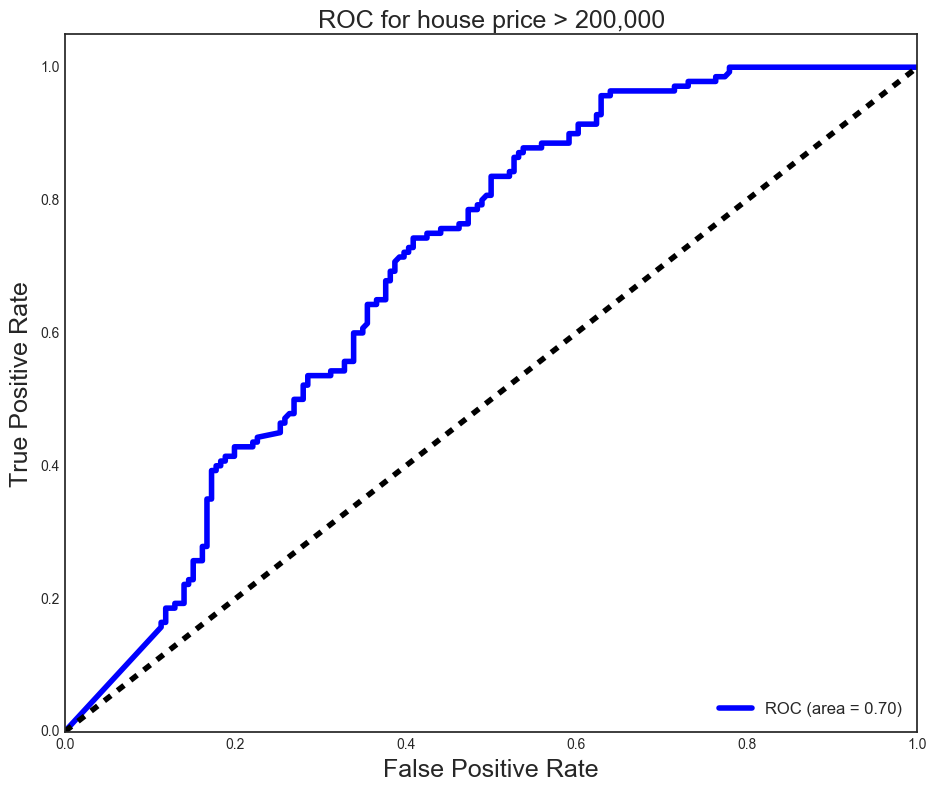

In [31]:
Y_score = logreg.decision_function(X_test)
plot_roc(y_test, Y_score)

Bonus: when might precision and recall be more useful than the ROC?

Precision and recall are more useful when the proportion of the positive class is smaller, since they are sensitive to this.